**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 7**
Análisis de Componentes Principales (PCA)

---

Equipo 24
DIEGO ALVARADO MARINO: A01795687
GABRIEL GARCÍA MONDRAGÓN: A00970838
Kevin Gutiérrez Pérez A01795692
Juan Luis Ramírez Sánchez A01705151

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 7/Actividad7_PCA"
os.chdir(DIR)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
cereals_df = pd.read_csv('Cereals.csv')
cereals_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


# **Parte 1**. EDA y preprocesamiento

1. Obtén estadísticas descriptivas para todas las variables del dataframe. 

In [3]:
cereals_df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,76.000000,76.000000,75.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.802632,7.026316,98.666667,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.907326,4.378656,70.410636,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,42.500000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [6]:
cereals_df.describe(include='object')
                   

,name,mfr,type
count,77,77,77
unique,77,7,2
top,100%_Bran,K,C
freq,1,23,74


Genera algunos gráficos para familiarizarte con el conjunto de datos. Al menos deberás incluir los que te permitan responder los siguientes cuestionamientos:

**Nota.** Debes responder de manera explícita las preguntas, apoyándote de los resultados observados de cada gráfico. 

2a) ¿Cuál es la frecuencia o conteo de cada categoría para las variables: `mfr` y `shelf` (por separado)? 

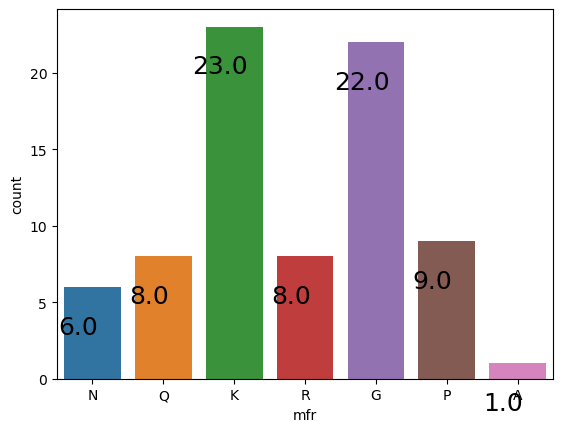

In [18]:
ax=sns.countplot(x=cereals_df['mfr'], data=cereals_df);
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=18)

Conteo por categoría para variable mfr:
K: 23
G: 22
P: 9
R: 8
Q: 8
N: 6
A: 1

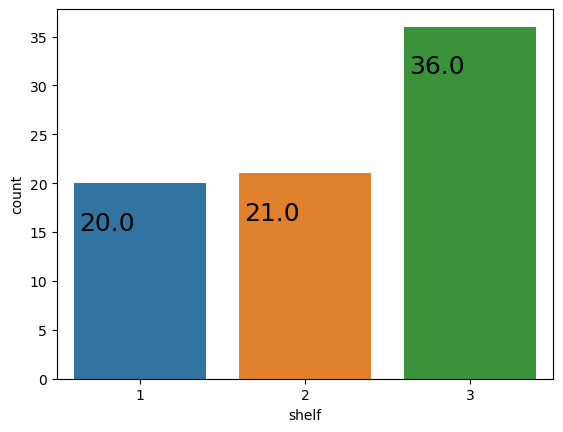

In [19]:
ax=sns.countplot(x=cereals_df['shelf'], data=cereals_df);
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=18)

Conteo por categoría para variable shelf:
3: 36
2: 21
1: 20

2b) Combina los resultados previos para observar, de cada fabricante, cuántos productos tiene en cada estante. 

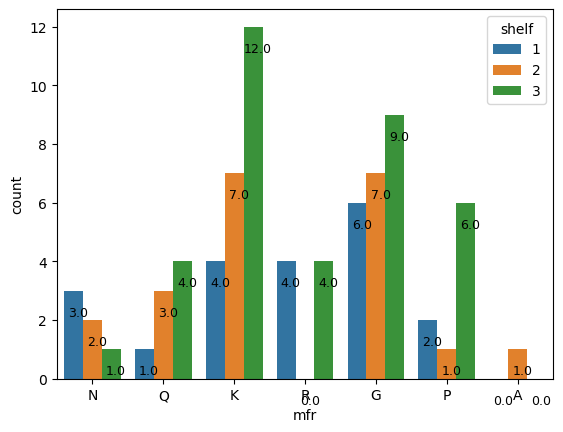

In [29]:
ax=sns.countplot(x=cereals_df['mfr'], data=cereals_df, hue = 'shelf');
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=9)

Conteo de productos por estante:
K:
Shelf 1: 4
Shelf 2: 7
Shelf 3: 12

G:
Shelf 1: 6
Shelf 2: 7
Shelf 3: 9

P: 
Shelf 1: 2
Shelf 2: 1
Shelf 3: 6

R: 
Shelf 1: 4
Shelf 2: 0
Shelf 3: 4

Q: 
Shelf 1: 1
Shelf 2: 3
Shelf 3: 4

N: 
Shelf 1: 3
Shelf 2: 2
Shelf 3: 1

A: 
Shelf 1: 0
Shelf 2: 1
Shelf 3: 0

 3a) ¿Cuál es el rango más frecuente de la variable `rating`?

<Axes: >

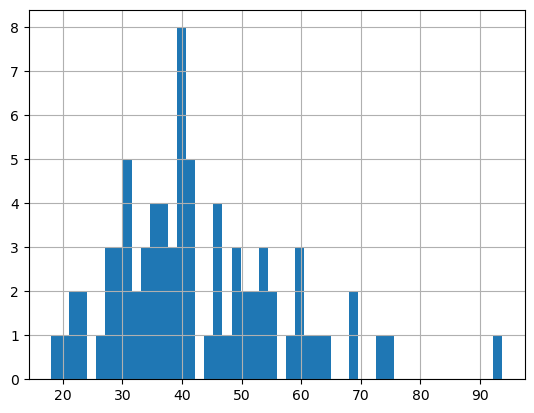

In [32]:
cereals_df['rating'].hist(bins=50)

<Axes: >

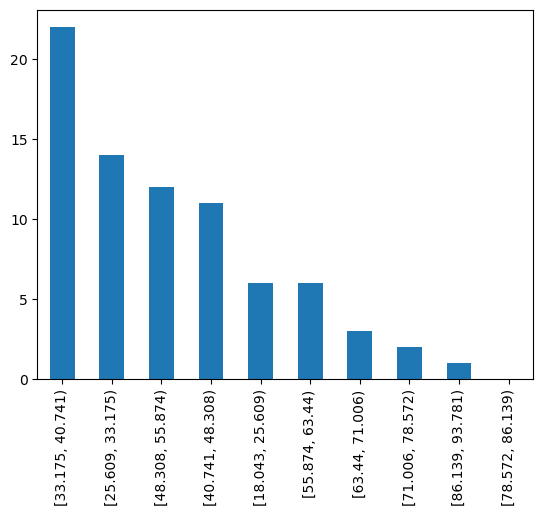

In [35]:
out, bins  = pd.cut(cereals_df['rating'], bins=10, include_lowest=True, right=False, retbins=True)
out.value_counts().plot.bar()

In [36]:
out.value_counts().head()

[33.175, 40.741)    22
[25.609, 33.175)    14
[48.308, 55.874)    12
[40.741, 48.308)    11
[18.043, 25.609)     6
Name: rating, dtype: int64

El rango más frecuente es el de 33.175 a 40.741

3b) ¿Cuáles son los 10 cereales mejor evaluados y a qué fabricante corresponden? 

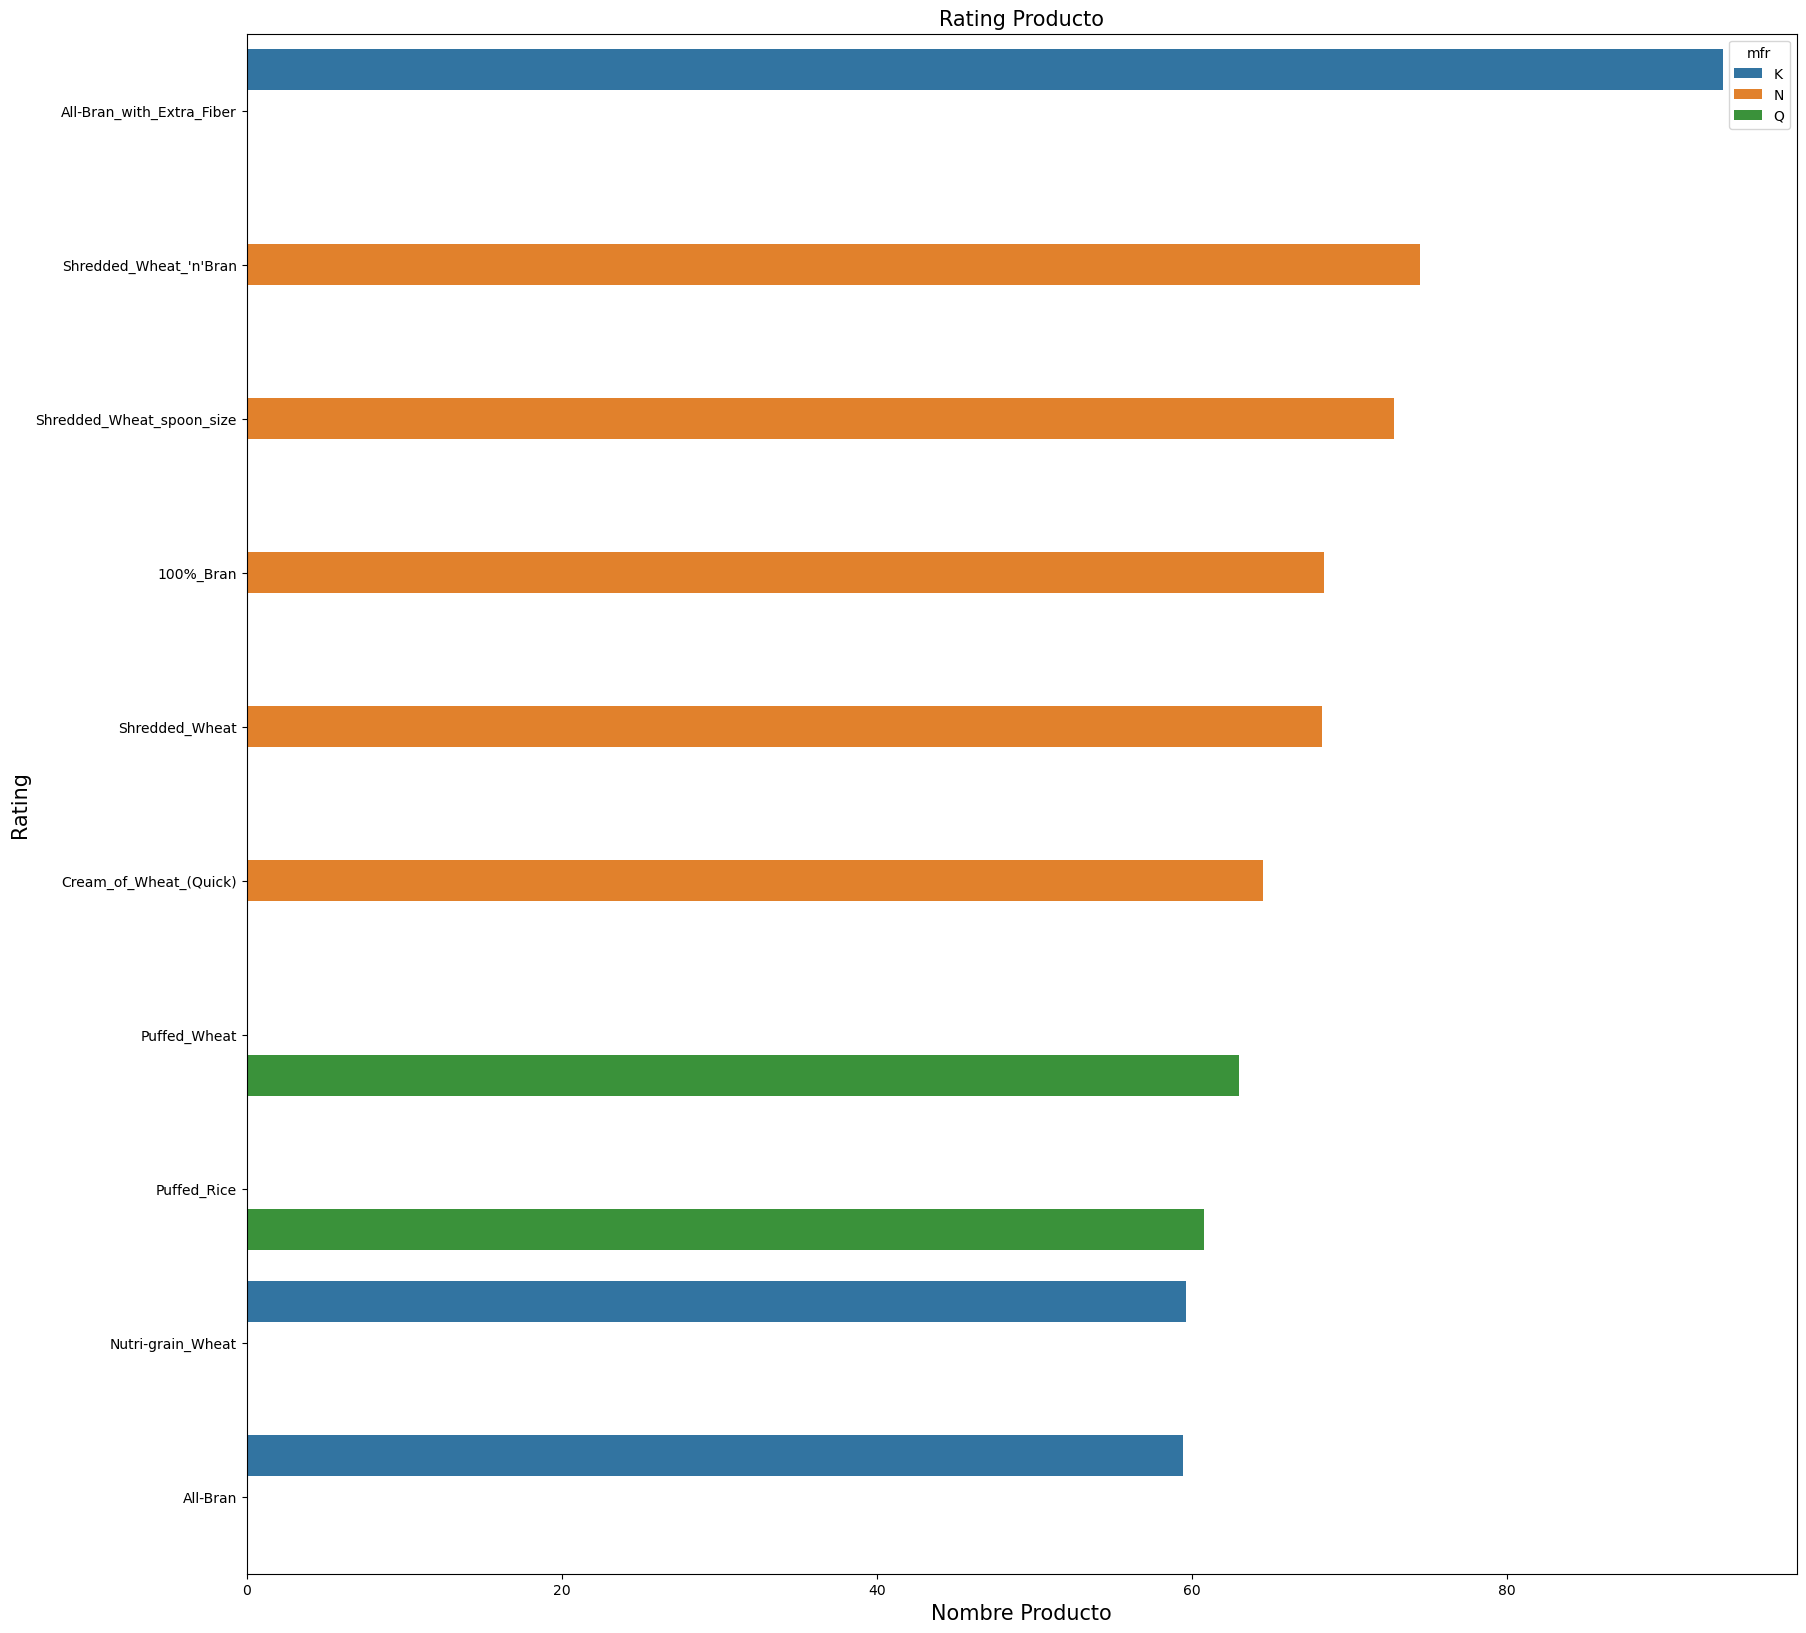

                        name mfr
0  All-Bran_with_Extra_Fiber   K
1     Shredded_Wheat_'n'Bran   N
2  Shredded_Wheat_spoon_size   N
3                  100%_Bran   N
4             Shredded_Wheat   N
5     Cream_of_Wheat_(Quick)   N
6               Puffed_Wheat   Q
7                Puffed_Rice   Q
8          Nutri-grain_Wheat   K
9                   All-Bran   K


In [49]:
rating_df = cereals_df.sort_values(['rating'],ascending=False).head(10)
plt.figure(figsize=(20,20))
sns.barplot(x=rating_df["rating"],y=rating_df["name"], hue = rating_df["mfr"])
plt.xlabel("Nombre Producto",fontsize=15)
plt.ylabel("Rating",fontsize=15)
plt.title("Rating Producto",fontsize=15)
plt.show()
print(rating_df[['name', 'mfr']].groupby('mfr').head(10).reset_index(drop=True))

4a) Compara la distribución de las calorías según el fabricante, por medio de boxplots. 

<Axes: xlabel='mfr', ylabel='calories'>

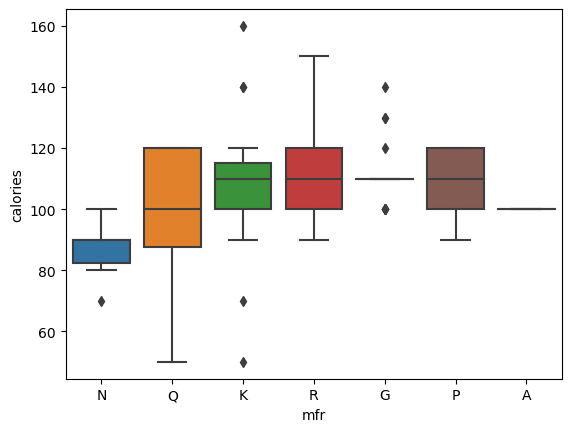

In [50]:
sns.boxplot(x="mfr",y="calories",data=cereals_df)

4b) ¿Cuáles son las dos variables que tienen mayor correlación con `rating`? 

/var/folders/w_/ntjdhtzx1p78cb49z37cs_5m0000gn/T/ipykernel_65303/2770541152.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = cereals_df.corr(method='pearson')


<Axes: >

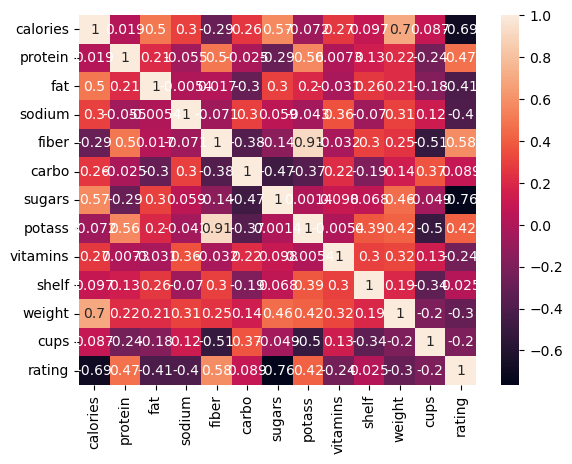

In [52]:
correlation = cereals_df.corr(method='pearson')

sns.heatmap(correlation,xticklabels=correlation.columns,
            yticklabels=correlation.columns, annot = True)

In [53]:
correlation

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.257638,0.566533,-0.072063,0.265356,0.097234,0.696091,0.087200,-0.689376
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.025012,-0.291853,0.563706,0.007335,0.133865,0.216158,-0.244469,0.470618
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.300003,0.302497,0.200445,-0.031156,0.263691,0.214625,-0.175892,-0.409284
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.297687,0.058866,-0.042632,0.361477,-0.069719,0.308576,0.119665,-0.401295
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.380357,-0.138760,0.911528,-0.032243,0.297539,0.247226,-0.513061,0.584160
carbo,0.257638,-0.025012,-0.300003,0.297687,-0.380357,1.000000,-0.471184,-0.365003,0.219202,-0.192650,0.138467,0.367460,0.088712
sugars,0.566533,-0.291853,0.302497,0.058866,-0.138760,-0.471184,1.000000,0.001414,0.098231,0.068377,0.455844,-0.048961,-0.763902
potass,-0.072063,0.563706,0.200445,-0.042632,0.911528,-0.365003,0.001414,1.000000,-0.005427,0.385784,0.419933,-0.501607,0.416009
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.219202,0.098231,-0.005427,1.000000,0.299262,0.320324,0.128405,-0.240544
shelf,0.097234,0.133865,0.263691,-0.069719,0.297539,-0.192650,0.068377,0.385784,0.299262,1.000000,0.190762,-0.335269,0.025159


Las variables que tienen mayor correlación con rating son protein y fiber.

5. Elimina todos los registros con algún dato faltante y reinicia el índice del dataframe para que quede con valores consecutivos. 

In [55]:
cereals_df = cereals_df.dropna()
cereals_df = cereals_df.reset_index(drop=True)
cereals_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
70,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
71,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
72,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


# **Parte 2**. Ingeniería de características

6. Considerando que `rating` es la variable de salida, almacénala en una variable `y` y separa los predictores **numéricos** en `X`. Escala los valores de `X` y aplica `PCA` para proyectar los datos en el nuevo espacio de vectores. 

In [79]:
# Separando predictores
x = cereals_df.iloc[:,[3,4,5,6,7,8,9,10,11,13,14]]
# Separando rating, asignando a variable y
y = cereals_df.loc[:,'rating']
x

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups
0,70,4,1,130,10.0,5.0,6.0,280.0,25,1.0,0.33
1,120,3,5,15,2.0,8.0,8.0,135.0,0,1.0,1.00
2,70,4,1,260,9.0,7.0,5.0,320.0,25,1.0,0.33
3,50,4,0,140,14.0,8.0,0.0,330.0,25,1.0,0.50
4,110,2,2,180,1.5,10.5,10.0,70.0,25,1.0,0.75
...,...,...,...,...,...,...,...,...,...,...,...
69,110,2,1,250,0.0,21.0,3.0,60.0,25,1.0,0.75
70,110,1,1,140,0.0,13.0,12.0,25.0,25,1.0,1.00
71,100,3,1,230,3.0,17.0,3.0,115.0,25,1.0,0.67
72,100,3,1,200,3.0,17.0,3.0,110.0,25,1.0,1.00


In [87]:
# Se obtiene número total de componentes
total_components = x.shape[1]
total_components

11

In [81]:
# Se realiza escalamiento de x
from sklearn.preprocessing import StandardScaler
escalar = StandardScaler()
x_scaled = escalar.fit_transform(x)
x_scaled[0:5]

array([[-1.87865227,  1.3911796 ,  0.        , -0.39369182,  3.25070642,
        -2.51720557, -0.25594026,  2.57800107, -0.18308346, -0.20220332,
        -2.09989497],
       [ 0.65821393,  0.45529514,  4.        , -1.79257173, -0.0729865 ,
        -1.74106718,  0.2060007 ,  0.51828763, -1.31209813, -0.20220332,
         0.76191901],
       [-1.87865227,  1.3911796 ,  0.        ,  1.18765068,  2.8352448 ,
        -1.99977998, -0.48691074,  3.14619788, -0.18308346, -0.20220332,
        -2.09989497],
       [-2.89339875,  1.3911796 , -1.        , -0.27205009,  4.91255287,
        -1.74106718, -1.64176313,  3.28824708, -0.18308346, -0.20220332,
        -1.37376306],
       [ 0.15084069, -0.48058932,  1.        ,  0.21451684, -0.28071731,
        -1.0942852 ,  0.66794165, -0.40503219, -0.18308346, -0.20220332,
        -0.30592203]])

In [82]:
# Se aplica PCA
from sklearn.decomposition import PCA
pca = PCA()
x_projected = pca.fit_transform(x_scaled)
x_projected = pd.DataFrame(x_projected)
x_projected.head(5)

,0,1,2,3,4,5,6,7,8,9,10
0,5.041308,2.470097,-0.054581,-1.129434,0.667588,0.640401,0.022399,0.059205,0.026325,0.250917,0.021692
1,1.503568,-0.310316,-3.014154,3.202758,1.344651,0.066992,-0.396573,-1.228817,-0.594837,0.042521,-0.096381
2,4.866598,1.946814,0.869813,-1.225550,0.358265,1.832924,-0.232872,0.017511,0.116766,-0.493001,-0.031211
3,5.468886,3.899001,1.883856,-1.628993,0.601691,0.374002,-0.811525,-1.003853,0.063792,0.720550,0.101563
4,0.088378,-0.391583,-1.490079,0.054716,0.331903,0.848360,0.271351,0.033091,-0.183945,0.169367,-0.050918


7. Obtén la curva del porcentaje de varianza acumulada y determine el número mínimo de componentes principales que explique más del 90% de la varianza. Imprime la información de dichos componentes. 

In [83]:
print("Valores eigen de la matriz de covarianza", list(np.round(pca.explained_variance_, decimals=5)))

Valores eigen de la matriz de covarianza [3.12424, 2.67116, 1.81049, 1.00253, 0.73121, 0.68051, 0.59632, 0.36298, 0.09424, 0.0585, 0.0185]


In [91]:
for i in range(0, total_components):
  print("Porcentaje de varianza explicada por componente principal", i+1, "es", format(pca.explained_variance_ratio_[i]*100,'.0f'),'%')

Porcentaje de varianza explicada por componente principal 1 es 28 %
Porcentaje de varianza explicada por componente principal 2 es 24 %
Porcentaje de varianza explicada por componente principal 3 es 16 %
Porcentaje de varianza explicada por componente principal 4 es 9 %
Porcentaje de varianza explicada por componente principal 5 es 7 %
Porcentaje de varianza explicada por componente principal 6 es 6 %
Porcentaje de varianza explicada por componente principal 7 es 5 %
Porcentaje de varianza explicada por componente principal 8 es 3 %
Porcentaje de varianza explicada por componente principal 9 es 1 %
Porcentaje de varianza explicada por componente principal 10 es 1 %
Porcentaje de varianza explicada por componente principal 11 es 0 %


In [85]:
np.cumsum(pca.explained_variance_ratio_)

array([0.28018344, 0.51973448, 0.68210045, 0.77200833, 0.83758401,
       0.89861296, 0.95209159, 0.98464348, 0.99309521, 0.99834125,
       1.        ])

In [ ]:
#sns.set_style('white')

plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.title('Análisis PCA')
plt.xlabel('Componente principal N')
plt.ylabel('% Varianza explicada acumulada')
plt.xticks(np.arange(0,total_components,1))
ax = plt.axes()        
ax.xaxis.grid()

labels = np.cumsum(pca.explained_variance_ratio_)*100
for i in range(total_components):
  plt.text(i,labels[i],str(format(labels[i],'.0f'))+'%')

Los primeros 8 componentes explican más del 90% de la varianza.

8. ¿Cuáles son las tres variables más importantes en el cálculo del primer componente?


In [97]:
pca.components_

array([[-0.01040615,  0.35678238,  0.19027226, -0.06472068,  0.49998564,
        -0.29577872,  0.05873503,  0.531454  , -0.03734692,  0.23742301,
        -0.38868677],
       [-0.57512964,  0.00479327, -0.2692828 , -0.30430762,  0.1470962 ,
        -0.14486307, -0.37580261,  0.01267244, -0.29039314, -0.48086725,
        -0.06718836],
       [-0.07785426,  0.32653778, -0.29122351,  0.34318558,  0.17405705,
         0.51293536, -0.49525541,  0.13062106,  0.32745985,  0.1221902 ,
         0.08261713],
       [ 0.23576248,  0.44809296,  0.59457322, -0.20063091, -0.18502884,
         0.20885433, -0.33946029, -0.07425895, -0.33740132, -0.15254926,
         0.11892967],
       [-0.15547992,  0.19572539,  0.26570851, -0.07702948,  0.02349511,
        -0.36158515,  0.03255133,  0.02967232,  0.67369701, -0.28852785,
         0.43661327],
       [-0.14674673, -0.10712071,  0.31086037,  0.82872108, -0.00308753,
        -0.21194747, -0.08706042, -0.05225799, -0.15137244, -0.28016639,
        -0.164

In [100]:
# Selección de número de componentes
num_components = 6
pc_df = pd.DataFrame(abs(pca.components_[:num_components]), columns = x.columns, index=['Componente principal {}'.format(i) for i in range(1, num_components + 1)])
pc_df

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups
Componente principal 1,0.010406,0.356782,0.190272,0.064721,0.499986,0.295779,0.058735,0.531454,0.037347,0.237423,0.388687
Componente principal 2,0.575130,0.004793,0.269283,0.304308,0.147096,0.144863,0.375803,0.012672,0.290393,0.480867,0.067188
Componente principal 3,0.077854,0.326538,0.291224,0.343186,0.174057,0.512935,0.495255,0.130621,0.327460,0.122190,0.082617
Componente principal 4,0.235762,0.448093,0.594573,0.200631,0.185029,0.208854,0.339460,0.074259,0.337401,0.152549,0.118930
Componente principal 5,0.155480,0.195725,0.265709,0.077029,0.023495,0.361585,0.032551,0.029672,0.673697,0.288528,0.436613
Componente principal 6,0.146747,0.107121,0.310860,0.828721,0.003088,0.211947,0.087060,0.052258,0.151372,0.280166,0.164101


/var/folders/w_/ntjdhtzx1p78cb49z37cs_5m0000gn/T/ipykernel_65303/2761478481.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=pc_df.iloc[0:1],ci=None)


Text(0, 0.5, 'Importancia de variable para PC1')

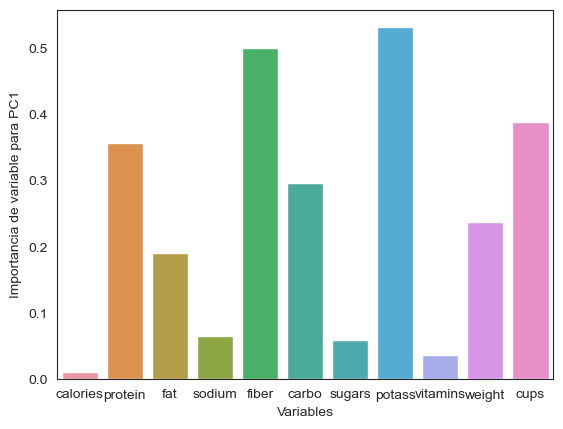

In [101]:
sns.barplot(data=pc_df.iloc[0:1],ci=None)
plt.xlabel('Variables')
plt.ylabel('Importancia de variable para PC1')

Las variables más importantes para PC1 son potass, fiber y cups.

9. ¿Todas las variables categóricas son predictores? Aplica una técnica de encoding a las que sí lo sean. Justifica la elección de tu técnica. 

No todas las variables categóricas son predictores. La variable elegida es mfr, pues tienen una cardinalidad alta. Se aplicará codificación binaria.

In [104]:
highly_cardinal_variables = cereals_df['mfr']
highly_cardinal_variables

0     N
1     Q
2     K
3     K
4     G
     ..
69    G
70    G
71    R
72    G
73    G
Name: mfr, Length: 74, dtype: object

In [106]:
from category_encoders.binary import BinaryEncoder
encoder = BinaryEncoder()
encoded_data = encoder.fit_transform(highly_cardinal_variables)
cat_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())
cat_df

,mfr_0,mfr_1,mfr_2
0,0,0,1
1,0,1,0
2,0,1,1
3,0,1,1
4,1,0,0
...,...,...,...
69,1,0,0
70,1,0,0
71,1,0,1
72,1,0,0


10. Conjunta, en un dataframe, las valores proyectados en los componentes seleccionados (mínimo), las transformaciones obtenidas de las variables categóricas que serán predictores y la variable de salida. Almacena el dataframe resultante en archivo. 

In [109]:
new_data = x_projected.iloc[:,0:num_components]

new_data.columns = ['PC{}'.format(i) for i in range(1, num_components + 1)]
new_data = pd.concat([new_data,y], axis=1)
res_df = pd.concat([new_data,cat_df], axis=1)
res_df

,PC1,PC2,PC3,PC4,PC5,PC6,rating,mfr_0,mfr_1,mfr_2
0,5.041308,2.470097,-0.054581,-1.129434,0.667588,0.640401,68.402973,0,0,1
1,1.503568,-0.310316,-3.014154,3.202758,1.344651,0.066992,33.983679,0,1,0
2,4.866598,1.946814,0.869813,-1.225550,0.358265,1.832924,59.425505,0,1,1
3,5.468886,3.899001,1.883856,-1.628993,0.601691,0.374002,93.704912,0,1,1
4,0.088378,-0.391583,-1.490079,0.054716,0.331903,0.848360,29.509541,1,0,0
...,...,...,...,...,...,...,...,...,...,...
69,-1.442524,-0.260808,1.160446,0.531351,-1.053122,0.817503,39.106174,1,0,0
70,-1.634842,-0.417530,-1.672206,-0.593553,0.134293,-0.082682,27.753301,1,0,0
71,0.389697,0.475626,1.182007,0.334499,-0.494861,0.820825,49.787445,1,0,1
72,-0.172304,0.491070,1.163945,0.580625,0.146570,0.290806,51.592193,1,0,0
